We'll explore how to quickly create multiple plots that are subsetted using one or more conditions.

We'll be working with the seaborn visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library.

We'll be working with a data set of the passengers of the Titanic. The Titanic shipwreck is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data set was compiled by Kaggle for their introductory data science competition, called Titanic: Machine Learning from Disaster. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes.

Data set can be downloading by navigating to the [data download page](https://www.kaggle.com/c/titanic/data) for the competition

The data for the passengers is contained in two files:

- train.csv: Contains data on 712 passengers
- test.csv: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the train.csv file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in test.csv, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in train.csv:

- PassengerId -- A numerical id assigned to each passenger.
- Survived -- Whether the passenger survived (1), or didn't (0).
- Pclass -- The class the passenger was in.
- Name -- the name of the passenger.
- Sex -- The gender of the passenger -- male or female.
- Age -- The age of the passenger. Fractional.
- SibSp -- The number of siblings and spouses the passenger had on board.
- Parch -- The number of parents and children the passenger had on board.
- Ticket -- The ticket number of the passenger.
- Fare -- How much the passenger paid for the ticket.
- Cabin -- Which cabin the passenger was in.
- Embarked -- Where the passenger boarded the Titanic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("train.csv")
print(titanic.info())
print(titanic.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7

Let's remove columns like Name and Ticket that we don't have a way to visualize. In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values

In [4]:
# columns to retain
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
titanic = titanic[cols].dropna(axis = 0)
print(titanic.info())
print(titanic.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB
None
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C


Seaborn works similarly to the pyplot module from matplotlib.Like the pyplot module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot.

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the Fare column using the seaborn.distplot() function:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


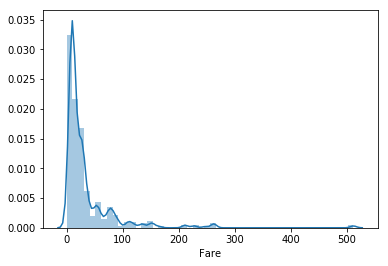

In [5]:
import seaborn as sns
sns.distplot(titanic["Fare"])
plt.show()

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. Resulting line is a smoother version of the histogram, called a kernel density plot. Kernel density plots are especially helpful when we're comparing distributions

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. 

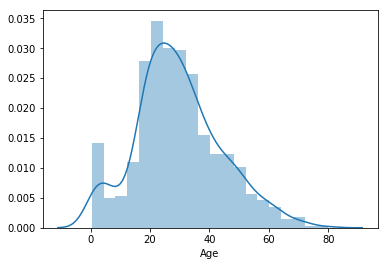

In [13]:
# Visualize the distribution of Age columns

sns.distplot(titanic["Age"]) # histogram is showing normalized value on y axis
plt.show()

While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. To generate just the kernel density plot, we use the seaborn.kdeplot() function:

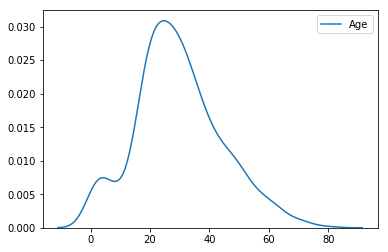

In [9]:
sns.kdeplot(titanic["Age"])
plt.show()

While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the seaborn.kdeplot() function, we can shade the area under the line by setting the shade parameter to True.

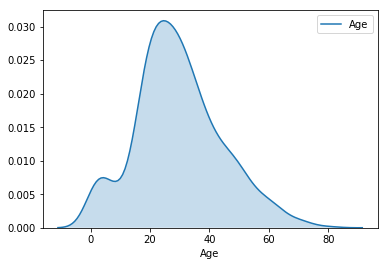

In [14]:
import seaborn as sns
sns.kdeplot(titanic["Age"], shade = True)
plt.xlabel("Age")
plt.show()

We can use the seaborn.set_style() function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

* darkgrid: Coordinate grid displayed, dark background color
* whitegrid: Coordinate grid displayed, white background color
* dark: Coordinate grid hidden, dark background color
* white: Coordinate grid hidden, white background color
* ticks: Coordinate grid hidden, white background color, ticks visible

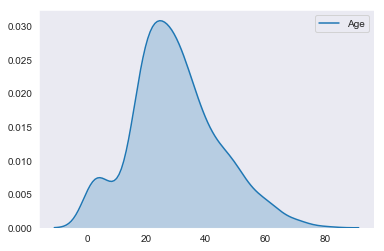

In [33]:
# change the style of the plot
sns.kdeplot(titanic["Age"], shade = True)
sns.set_style("whitegrid")
plt.show()

If we change the style sheet using above method, all future plots will match that style in our current session. This means we 
need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the seaborn.despine() function:

sns.despine()
By default, only the top and right axes will be despined, or have their spines removed. To despine the other two axes, we need to set the left and bottom parameters to True.

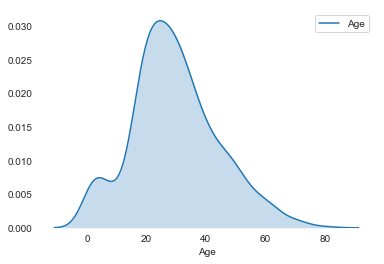

In [45]:
sns.kdeplot(titanic["Age"], shade = "True")
sns.set_style("white")
plt.xlabel("Age")
sns.despine(bottom = True, left = True)
plt.show()

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the "Age" column where Survived equalled 0 and the other would visualize the distribution of values in the "Age" column where Survived equalled 1.

The code to generate the pair of plots, is short and sweet:

##### Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
##### For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
Seaborn handled:

subsetting the data into rows where Survived is 0 and where Survived is 1
creating both Axes objects, ensuring the same axis scales
plotting both kernel density plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


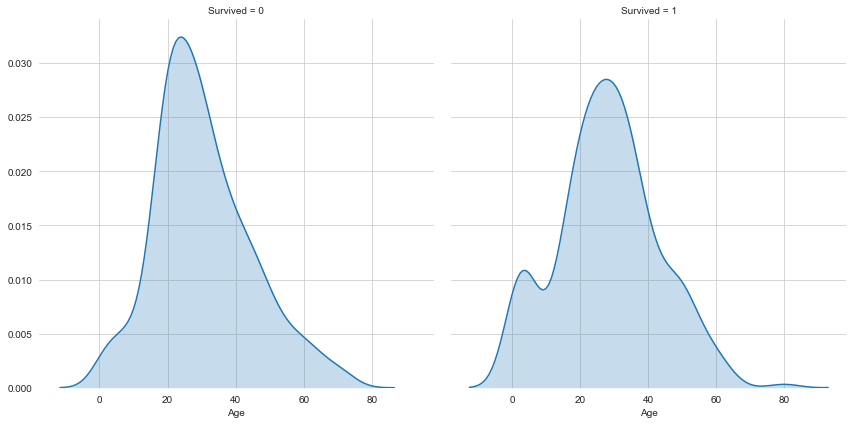

In [52]:
g = sns.FacetGrid(titanic, col = "Survived", size = 6) 
# # Setting the col parameter to "Survived" specifies a separate plot for each unique value in the Survived
# Setting the size parameter to 6 specifies a height of 6 inches for each plot.
g.map(sns.kdeplot,"Age", shade = True)
# FacetGrid.map() method to specify the plot we want for each unique value of Survived
# The function that's passed into FacetGrid.map() has to be a valid matplotlib or seaborn function. 
# For example, we can map matplotlib histograms to the grid
# g = sns.FacetGrid(titanic, col="Survived", size=6)
# g.map(plt.hist, "Age")
sns.despine(bottom = True, left = True
sns.set_style("whitegrid")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


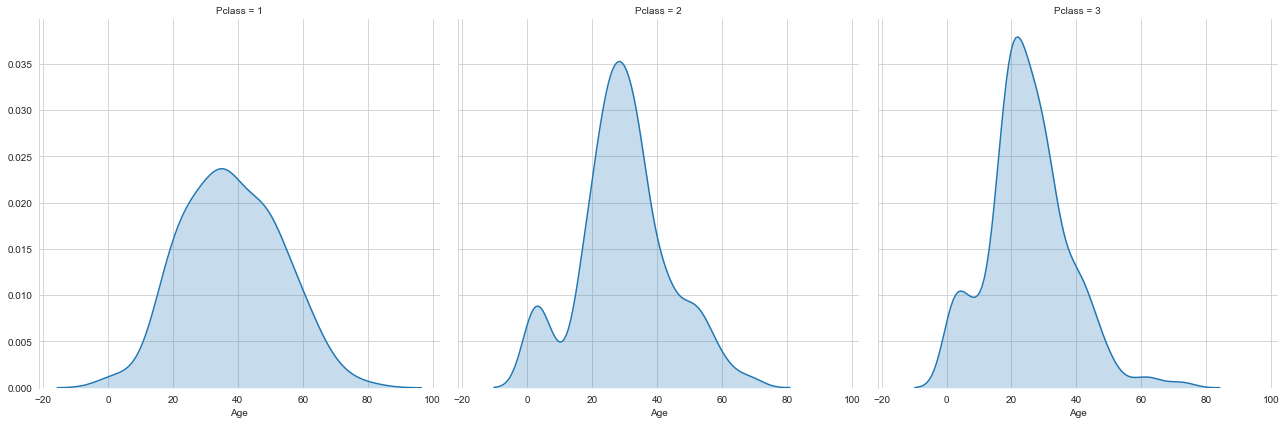

In [53]:
sns.FacetGrid(titanic, col = "Pclass", size = 6).map(sns.kdeplot,"Age", shade = True)
sns.despine(bottom = True, right = True)
plt.show()

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


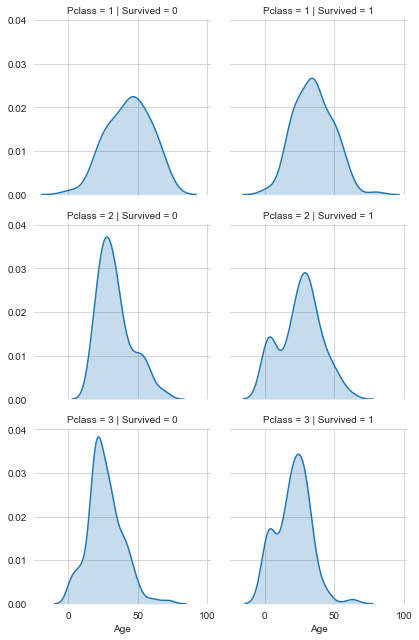

In [54]:
sns.FacetGrid(titanic, col = "Survived", row = "Pclass").map(sns.kdeplot, "Age", shade = True)
sns.despine(bottom = True, left = True)
plt.show()

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. We can add a condition just by setting the hue parameter to the column name from the dataframe.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


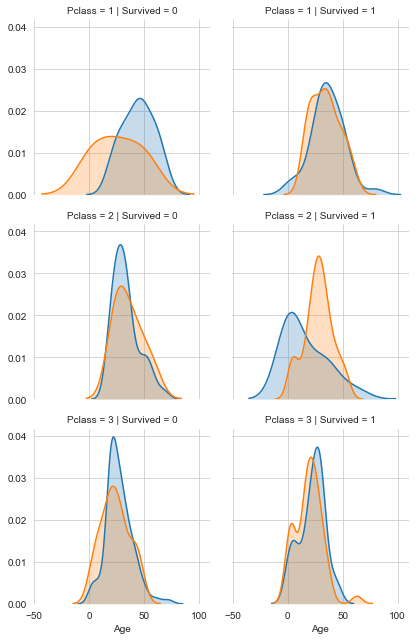

In [59]:
sns.FacetGrid(titanic, col = "Survived", row = "Pclass", hue = "Sex", size = 3,).map(sns.kdeplot, "Age", shade = True)
sns.despine(bottom = True, left = True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


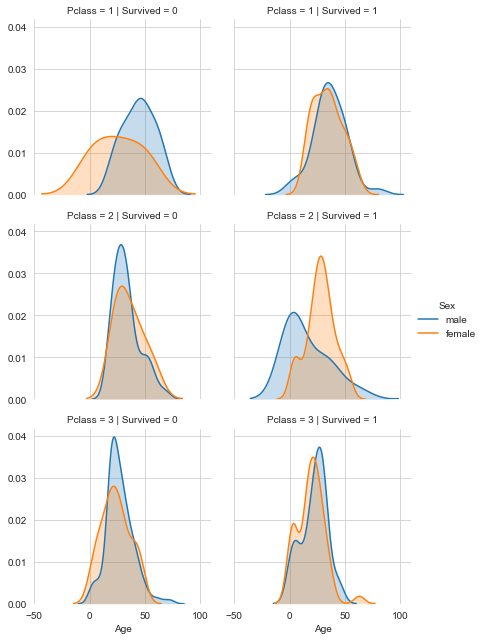

In [61]:
# adding legends
g = sns.FacetGrid(titanic, col = "Survived", row = "Pclass", hue = "Sex", size = 3,).map(sns.kdeplot, "Age", shade = True)
g.add_legend()
sns.despine(bottom = True, left = True)
plt.show()